In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

## Test Audio

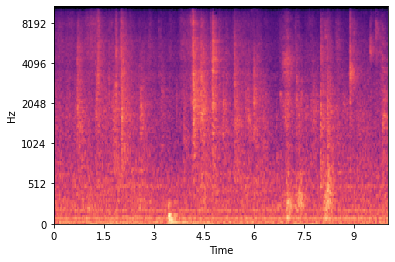

In [ ]:
filepath1 = '/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/Classroom/classroom/classroom-001.mp3'
filepath2 = '/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/Cabaret/cabaret/cabaret01-001.mp3'
filepath3 = '/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/Large_public_room/large_public_room/large_public_room-001.mp3'
f, sr = librosa.load(filepath1)
f2, sr2 = librosa.load(filepath2)
f3, sr3 = librosa.load(filepath3)
# st = librosa.stft(f)
# st2 = librosa.stft(f2)
# st3 = librosa.stft(f3)

mel_spectrogram1 = librosa.feature.melspectrogram(f, sr)
log_mel_spectrogram1 = librosa.power_to_db(mel_spectrogram1)
librosa.display.specshow(log_mel_spectrogram1, x_axis="time", y_axis="mel", sr=sr)

# spectogram = np.abs(st)
# plt.imshow(log_mel_spectrogram)
Audio(filepath1)

In [ ]:
log_mel_spectrogram.shape

(128, 432)

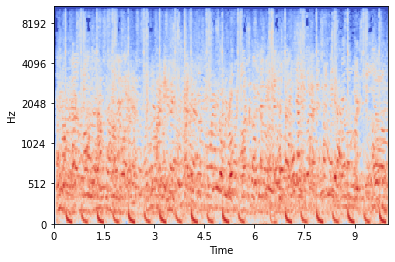

In [ ]:
# spectogram2 = np.abs(st2)
# plt.imshow(librosa.amplitude_to_db(spectogram2))

mel_spectrogram2 = librosa.feature.melspectrogram(f2, sr2)
log_mel_spectrogram2 = librosa.power_to_db(mel_spectrogram2)
librosa.display.specshow(log_mel_spectrogram2, x_axis="time", y_axis="mel", sr=sr2)

Audio(filepath2)

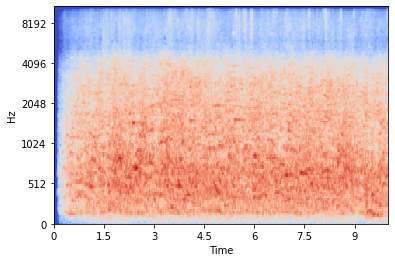

In [ ]:
# spectogram3 = np.abs(st3)
# plt.imshow(librosa.amplitude_to_db(spectogram3))

mel_spectrogram3 = librosa.feature.melspectrogram(f3, sr3)
log_mel_spectrogram3 = librosa.power_to_db(mel_spectrogram3)
librosa.display.specshow(log_mel_spectrogram3, x_axis="time", y_axis="mel", sr=sr3)

Audio(filepath3)

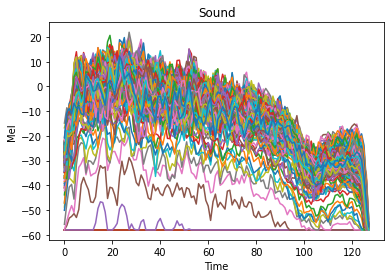

In [ ]:
plt.plot(log_mel_spectrogram3);

plt.title('Sound');

plt.xlabel('Time');

plt.ylabel('Mel');

## Data Prepessing

In [ ]:
# def spect(wave):
#     f, sr = librosa.load("/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/"+ wave, duration = 9)
#     st = librosa.stft(f)
#     spectogram = np.abs(st)
    
#     return spectogram

In [3]:
def spect(wave):
    f, sr = librosa.load("/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/"+ wave, duration = 9)
    mel_spectrogram = librosa.feature.melspectrogram(f, sr)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    
    return log_mel_spectrogram

In [4]:
x = list()
y = list()
Ca_files = os.listdir('/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/Cabaret/cabaret/')
Classr_files = os.listdir('/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/Classroom/classroom/')
Public_file = os.listdir('/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/Large_public_room/large_public_room/')

for l in tqdm(Classr_files):
  file1 = "Classroom/classroom/"+ l
  data = spect(file1) #อ่านข้อมูลเสียงทีละไฟล์
  x.append(data)  # อัดเข้าตัวแปร x    
  y.append([1,0,0]) #กำหนด label 1,0 คือ Classroom เข้าตัวแปร y

for l in tqdm(Ca_files):
  file1 = "Cabaret/cabaret/"+ l
  data = spect(file1) 
  x.append(data)
  y.append([0,1,0]) 

for l in tqdm(Public_file):
  file1 = "Large_public_room/large_public_room/"+ l
  data = spect(file1)
  x.append(data)      
  y.append([0,0,1])

100%|██████████| 243/243 [04:14<00:00,  1.05s/it]


In [5]:
X = np.array(x)
y = np.array(y)
X.shape, y.shape

((857, 128, 388), (857, 3))

In [7]:
from sklearn.model_selection import train_test_split
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
xtrain, xtest, ytrain, ytest = train_test_split(X,y, train_size = 0.80, random_state=42)

In [8]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((685, 128, 388, 1), (172, 128, 388, 1), (685, 3), (172, 3))

In [9]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout

In [10]:
xtrain.shape[1:]

(128, 388, 1)

In [13]:
model = keras.Sequential([
  keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=xtrain.shape[1:]),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  keras.layers.Conv2D(128,(3,3) , activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  keras.layers.Dense(64),
  keras.layers.Dense(16),
  keras.layers.Flatten(),
 
  keras.layers.Dense(3),
  keras.layers.Activation('softmax')
])
  
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics= ['accuracy'])
batch_size = 16
epochs = 50

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 386, 128)     1280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 193, 128)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 191, 128)      147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 95, 128)      0         
 2D)                                                             
                                                                 
 dense_3 (Dense)             (None, 30, 95, 64)        8256      
                                                                 
 dense_4 (Dense)             (None, 30, 95, 16)       

In [15]:
history = model.fit(xtrain, ytrain, batch_size = batch_size ,epochs=epochs, validation_data=(xtest, ytest))

Epoch 1/50
43/43 [==============================] - 13s 98ms/step - loss: 0.8192 - accuracy: 0.8934 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2/50
43/43 [==============================] - 3s 72ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.0871e-04 - val_accuracy: 1.0000
Epoch 3/50
43/43 [==============================] - 3s 72ms/step - loss: 0.1038 - accuracy: 0.9869 - val_loss: 2.1560e-04 - val_accuracy: 1.0000
Epoch 4/50
43/43 [==============================] - 3s 74ms/step - loss: 9.0379e-05 - accuracy: 1.0000 - val_loss: 1.6337e-05 - val_accuracy: 1.0000
Epoch 5/50
43/43 [==============================] - 3s 76ms/step - loss: 8.0157e-06 - accuracy: 1.0000 - val_loss: 3.4306e-06 - val_accuracy: 1.0000
Epoch 6/50
43/43 [==============================] - 3s 75ms/step - loss: 1.9275e-06 - accuracy: 1.0000 - val_loss: 1.5123e-06 - val_accuracy: 1.0000
Epoch 7/50
43/43 [==============================] - 3s 80ms/step - loss: 6.2702e-07 - accuracy: 1.0000 - val_loss: 2.0446

In [17]:
import itertools

los: 0.0
val_loss: 0.0


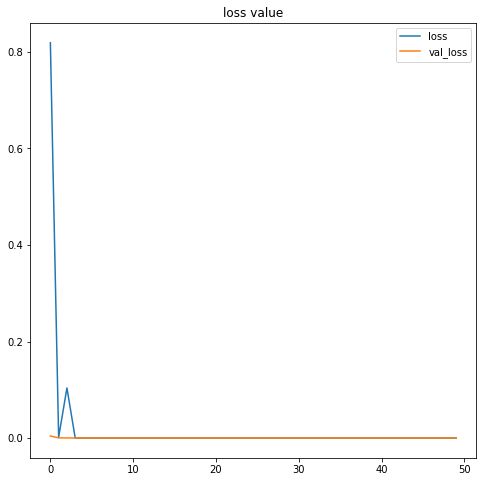

acc: 1.0
val_acc: 1.0


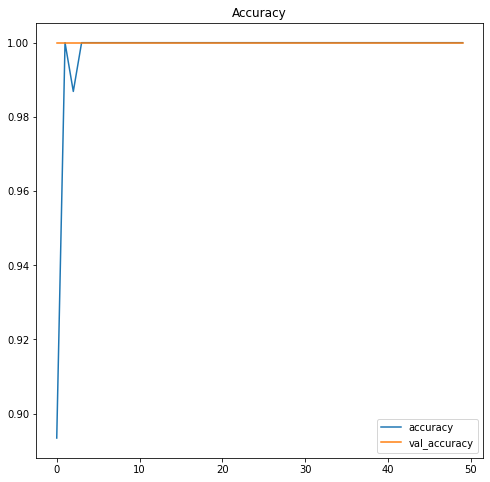

In [19]:
plt.figure(figsize=(8,8))
plt.title('loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
print('los:', history.history['loss'][-1])
print('val_loss:', history.history['val_loss'][-1])
plt.show()
plt.figure(figsize=(8,8))
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
print('acc:', history.history['accuracy'][-1])
print('val_acc:', history.history['val_accuracy'][-1])
plt.show()

In [29]:
def wav2predict(sf): 
  data = spect(sf)
  data2arr = np.array(data) 
  testsound = data2arr.reshape(1, data2arr.shape[0], data2arr.shape[1], 1) 
  p = model.predict(testsound) 
  label = ['Classroom','Cabaret','Public'] 
  i = np.argmax(p) 
  prop = np.max(p) 
  result = label[i] 
  return result , prop 

In [44]:
def wav22predict(sf): 
  data = spect(sf)
  data2arr = np.array(data) 
  testsound = data2arr.reshape(1, data2arr.shape[0], data2arr.shape[1], 1) 
  p = model.predict(testsound) 
  label = ['Classroom','Cabaret','Public'] 
  i = np.argmax(p) 
  prop = np.max(p) 
  result = label[i] 
  return i

In [46]:
test_file = os.listdir('/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/test')
y_pred = []
for t in tqdm(test_file):
  sound = "test/" + t
  print(sound)
  r = wav22predict(sound)
  y_pred.append(r)

  0%|          | 0/34 [00:00<?, ?it/s]

test/cabarettest01.mp3
1/1 [==============================] - 0s 32ms/step


  3%|▎         | 1/34 [00:00<00:17,  1.89it/s]

test/cabaret02-086.mp3
1/1 [==============================] - 0s 26ms/step


  6%|▌         | 2/34 [00:01<00:16,  1.90it/s]

test/cabaret02-075.mp3
1/1 [==============================] - 0s 23ms/step


  9%|▉         | 3/34 [00:01<00:16,  1.91it/s]

test/cabaret02-061.mp3
1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 4/34 [00:02<00:15,  1.90it/s]

test/cabarettest02.mp3
1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 5/34 [00:02<00:15,  1.90it/s]

test/cabaret02-093.mp3
1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 6/34 [00:03<00:14,  1.89it/s]

test/cabaret02-056.mp3
1/1 [==============================] - 0s 24ms/step


 21%|██        | 7/34 [00:03<00:14,  1.90it/s]

test/cabaret02-043.mp3
1/1 [==============================] - 0s 27ms/step


 24%|██▎       | 8/34 [00:04<00:13,  1.89it/s]

test/cabaret02-049.mp3
1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 9/34 [00:04<00:13,  1.89it/s]

test/cabaret02-081.mp3
1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 10/34 [00:05<00:12,  1.88it/s]

test/cabaret02-197.mp3
1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 11/34 [00:05<00:12,  1.89it/s]

test/cabaret02-189.mp3
1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 12/34 [00:06<00:11,  1.89it/s]

test/cabaret02-237.mp3
1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 13/34 [00:06<00:11,  1.87it/s]

test/cabaret02-243.mp3
1/1 [==============================] - 0s 29ms/step


 41%|████      | 14/34 [00:07<00:10,  1.85it/s]

test/cabaret02-146.mp3
1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 15/34 [00:07<00:10,  1.88it/s]

test/cabaret02-136.mp3
1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 16/34 [00:08<00:09,  1.87it/s]

test/cabaret02-251.mp3
1/1 [==============================] - 0s 23ms/step


 50%|█████     | 17/34 [00:09<00:09,  1.88it/s]

test/cabaret02-175.mp3
1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 18/34 [00:09<00:08,  1.87it/s]

test/cabaret02-151.mp3
1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 19/34 [00:10<00:08,  1.87it/s]

test/cabaret02-155.mp3
1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 20/34 [00:10<00:07,  1.88it/s]

test/cabaret02-181.mp3
1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 21/34 [00:11<00:06,  1.87it/s]

test/cabaret02-160.mp3
1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 22/34 [00:11<00:06,  1.87it/s]

test/concert-048.mp3
1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 23/34 [00:12<00:05,  1.87it/s]

test/concert-052.mp3
1/1 [==============================] - 0s 29ms/step


 71%|███████   | 24/34 [00:12<00:05,  1.87it/s]

test/concert-038.mp3
1/1 [==============================] - 0s 29ms/step


 74%|███████▎  | 25/34 [00:13<00:04,  1.88it/s]

test/concert-062.mp3
1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 26/34 [00:13<00:04,  1.85it/s]

test/concert-055.mp3
1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 27/34 [00:14<00:03,  1.85it/s]

test/concert-072.mp3
1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 28/34 [00:14<00:03,  1.86it/s]

test/concert-031.mp3
1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 29/34 [00:15<00:02,  1.87it/s]

test/concert-011.mp3
1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 30/34 [00:15<00:02,  1.87it/s]

test/classroomtest03.mp3
1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 31/34 [00:16<00:01,  1.90it/s]

test/classroomtest02.mp3
1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 32/34 [00:17<00:01,  1.91it/s]

test/classroomtest01.mp3
1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 33/34 [00:17<00:00,  1.93it/s]

test/Copy of large_public_room-238.mp3
1/1 [==============================] - 0s 24ms/step


100%|██████████| 34/34 [00:18<00:00,  1.89it/s]


In [47]:
y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2]

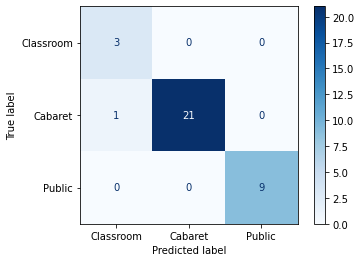

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


y_pred = np.array(y_pred)
y_test = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2])
labels = ['Classroom','Cabaret','Public']

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [34]:
sound = 'test/classroomtest03.mp3'
r = wav2predict(sound)
print(r)
Audio('/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/test/classroomtest03.mp3')

1/1 [==============================] - 0s 24ms/step
('Classroom', 0.9999845)


In [ ]:
test_file = os.listdir('/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/test')
y_pred = []
for t in tqdm(test_file):
  sound = "test/" + t
  r = wav22predict(sound)
  print(r)